In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
base_path = "./experiments/"
#experiment = 'BeijingPM25Quality_finetuned_2023-05-04_16-57-42_wdT'

experiment = 'poseErrorPred_fromScratch_Regression_Selective_2023-05-18_16-02-57_geu'

#experiment = 'poseErrorPred_finetuned_2023-05-15_15-24-08_YX7'

#experiment = 'poseErrorPred_finetuned_2023-05-15_16-11-22_MJO'

file_path = '/predictions/best_predictions.npz'

total_path = base_path + experiment + file_path

In [48]:
pred = np.load(total_path, allow_pickle=True)

In [49]:
pred.files

['target_masks', 'targets', 'predictions', 'metrics', 'IDs']

In [50]:
#pred['metrics'][0]
#pred['IDs']

In [51]:
pred['targets'][0].shape

(128, 1)

In [52]:
y = np.concatenate(pred["targets"], axis=0)
y.shape

(22125, 1)

In [53]:
y_pred = np.concatenate(pred["predictions"], axis=0)
y_pred.shape

(22125, 1)

In [54]:
def get_mape(y, y_pred):
    err = y - y_pred
    return np.mean(np.abs(err)/y)

def get_mse(y, y_pred):
    err = y - y_pred
    return np.mean(np.square(err))

In [55]:
get_mse(y, y_pred)

0.0006167935

In [56]:
get_mape(y, y_pred)

0.4479458

In [57]:
def visualize_output(y, y_pred, title=' '):
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 6))
    fig.tight_layout(pad=3.0)
    
    ax0.plot(y, color='g', label='truth')
    ax0.set_title(title)
    ax0.set_xlabel('Step')
    ax0.set_ylabel('Error')
    ax0.grid()
    ax0.legend()
    
    ax1.plot(y, color='g', label='truth')
    ax1.plot(y_pred, color='b', alpha=0.7, label='predict')
    mse = get_mse(y, y_pred)
    mape = get_mape(y, y_pred)
    ax1.set_title(title+"- mse: {:.5f} | mape: {:.5f}".format(mse, mape))
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Error')
    ax1.grid()
    ax1.legend()
    plt.show()

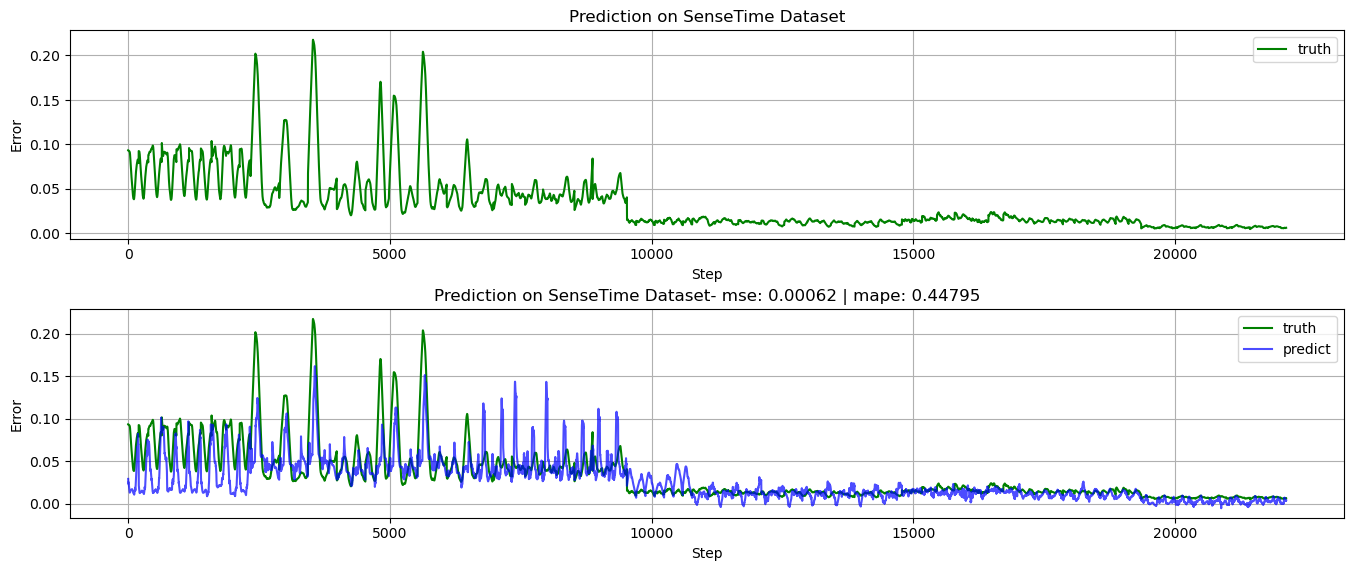

In [58]:
visualize_output(y, y_pred, title='Prediction on SenseTime Dataset')

In [39]:
y_truth = pred['targets']
y_pred = pred['predictions']

In [40]:
y_truth
y_pred.shape

(173,)

In [41]:
y_truth[2].shape

(128, 1)

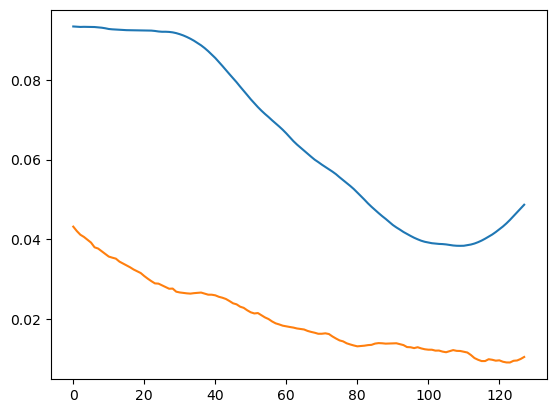

In [42]:
idx = 0
plt.plot(y_truth[idx])
plt.plot(y_pred[idx])

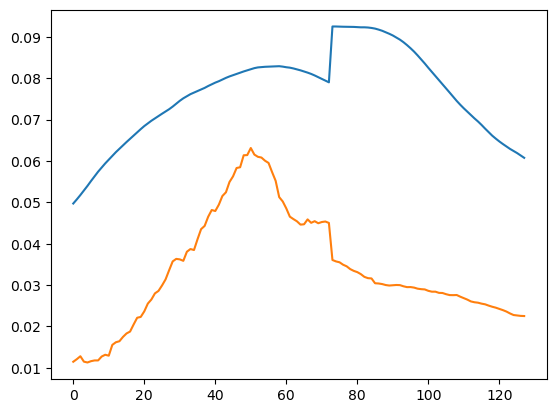

In [43]:
idx = 1
plt.plot(y_truth[idx])
plt.plot(y_pred[idx])

In [44]:
idx = 0

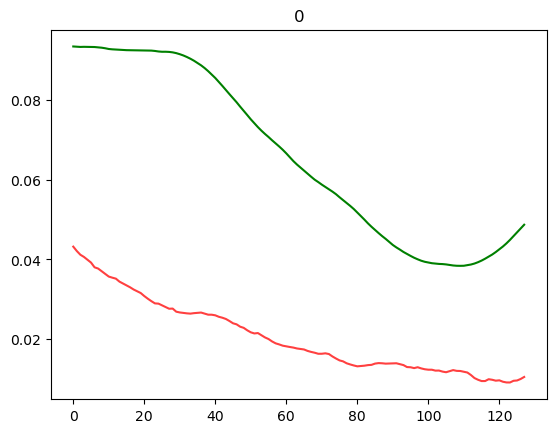

In [45]:
plt.title(str(idx))
plt.plot(y_truth[idx], c='g')
plt.plot(y_pred[idx], c='r', alpha=0.75)
idx += 1